In [1]:
%matplotlib inline
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 25 22:12:44 2018

@author: miaortizma
"""
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import random

'''
Returns the array after insertion
and the number of comparations, swaps and other instructions made
'''
def insert(arr, j):
    i = j
    while(i > 0 and arr[i] < arr[i-1]):
        arr[i], arr[i-1] = arr[i-1],arr[i]
        i = i - 1
    if(i == 0):
        comparations = 2*(j) + 1
        others = 1 + (j - 1)
    elif(i == j):
        comparations = 2
    else:    
        comparations = 2*(j - i)
    swaps = j - i
    others = 1 + (j - i)
    return arr, (comparations, swaps, others)


def insertionSort(toSort):
    n = len(toSort)
    comparations = 0
    swaps = 0
    others = 0
    for i in range(1,n):
        toSort, temp = insert(toSort, i)
        comparations = comparations + temp[0]
        swaps = swaps + temp[1]
        others = others + temp[2]
    return (comparations, swaps, others)


In [28]:
def graph(comparations, swaps, others):
    N = len(comparations)
    print("Average:")
    print("Comparations:", sum(comparations)/N)
    print("Swaps:", sum(swaps)/N)
    print("Others:", sum(others)/N)
    print("Distribucion:")
    plt.hist(comparations,bins='auto')
    plt.title("Histogram of Comparations")
    plt.show()
    plt.hist(swaps,bins='auto')
    plt.title("Histogram of Swaps")
    plt.show()
    plt.hist(others,bins='auto')
    plt.title("Histogram of Others")
    plt.show()
    allOps = comparations + swaps + others
    plt.title("Histogram of all operations")
    plt.hist(allOps, bins='auto')
    plt.show()

'''
Referencia Heap's Algorithm - wikipedia
'''

def generate(n):
    A = list(range(1,n+1))
    c = [0]*n
    yield A
    i = 0
    while i < n:
        if  c[i] < i:
            if i%2 == 0:
                A[0],A[i] = A[i], A[0]
            else:
                A[c[i]],A[i] = A[i], A[c[i]]
            yield A
            c[i] = c[i] + 1
            i = 0
        else:
            c[i] = 0
            i = i + 1

def shuffle(A):
    A = list(A)
    n = len(A)
    for i in range(n-1):
        j = random.randint(i,n-1)
        A[j],A[i] = A[i], A[j]
    return A


In [29]:
def allPerms(n, perms):
    if(n > 8):
        print("Input too big, try a number like 8 or less")
    comparations = []
    swaps = []
    others = []
    for perm in perms:
        temp = insertionSort(list(perm))
        comparations = comparations + [temp[0]]
        swaps = swaps + [temp[1]]
        others = others + [temp[2]]
    graph(comparations, swaps, others)
    
def samplePerms(n, m, rnd):
    comparations = []
    swaps = []
    others = []
    rng = range(n)
    for i in range(m):
        nxt = rnd(rng)
        print(nxt)
        temp = insertionSort(nxt)
        comparations = comparations + [temp[0]]
        swaps = swaps + [temp[1]]
        others = others + [temp[2]]
    graph(comparations, swaps, others)

n = 5
#allPerms(n, generate(n))

[2, 3, 5, 4, 1]
[4, 1, 11, 10, 16, 15, 7, 6, 17, 18, 14, 13, 8, 12, 5, 2, 9, 19, 3, 0]
[13, 10, 18, 9, 1, 3, 16, 6, 4, 17, 14, 19, 15, 8, 0, 7, 11, 12, 5, 2]
[15, 8, 0, 13, 1, 2, 4, 6, 16, 10, 17, 14, 11, 9, 19, 7, 12, 5, 18, 3]
[4, 16, 8, 10, 18, 15, 2, 3, 17, 9, 13, 0, 5, 11, 12, 1, 6, 19, 14, 7]
[11, 2, 14, 3, 5, 12, 9, 10, 13, 4, 6, 16, 18, 8, 17, 19, 0, 1, 7, 15]
[9, 11, 19, 16, 1, 18, 2, 12, 7, 3, 5, 13, 0, 6, 14, 8, 10, 15, 4, 17]
[17, 11, 7, 5, 3, 2, 10, 9, 13, 1, 16, 6, 0, 4, 12, 14, 18, 8, 15, 19]
[5, 1, 10, 15, 19, 6, 13, 11, 7, 0, 8, 3, 4, 14, 18, 17, 2, 16, 12, 9]
[12, 18, 4, 6, 0, 15, 1, 9, 2, 17, 3, 10, 19, 16, 8, 11, 5, 13, 14, 7]
[17, 0, 13, 10, 9, 1, 4, 8, 5, 14, 6, 15, 7, 12, 19, 11, 18, 2, 16, 3]
Average:
Comparations: 187.4
Swaps: 89.7
Others: 108.7
Distribucion:


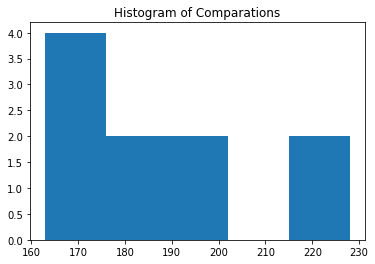

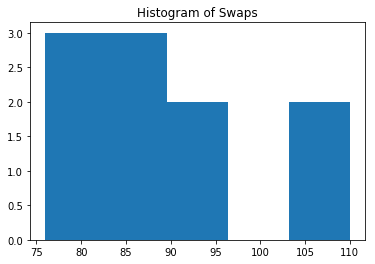

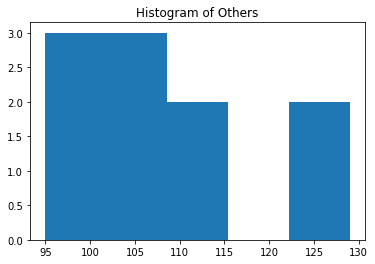

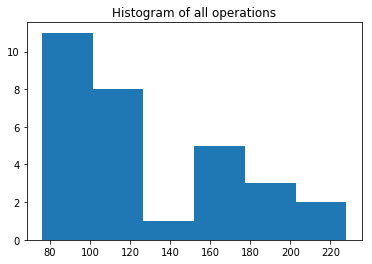

In [30]:
print(shuffle([1,2,3,4,5]))
samplePerms(20, 10, shuffle)
#samplePerms(20, 10, np.random.permutation)

Se observa una distribución normal en cada una de las variables.

El limite para una memoria RAM de 6Gb en la generación de todas las permutaciones es 11, más de 8 ya se demoran mucho.